# **XGBoost Breast Cancer**

### Importing libraries 

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, confusion_matrix, classification_report

# 🎨 Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

### Importing dataset

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [23]:
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = df['target'].apply(lambda x: target_names[x])

#### Pairplots for feature visualization

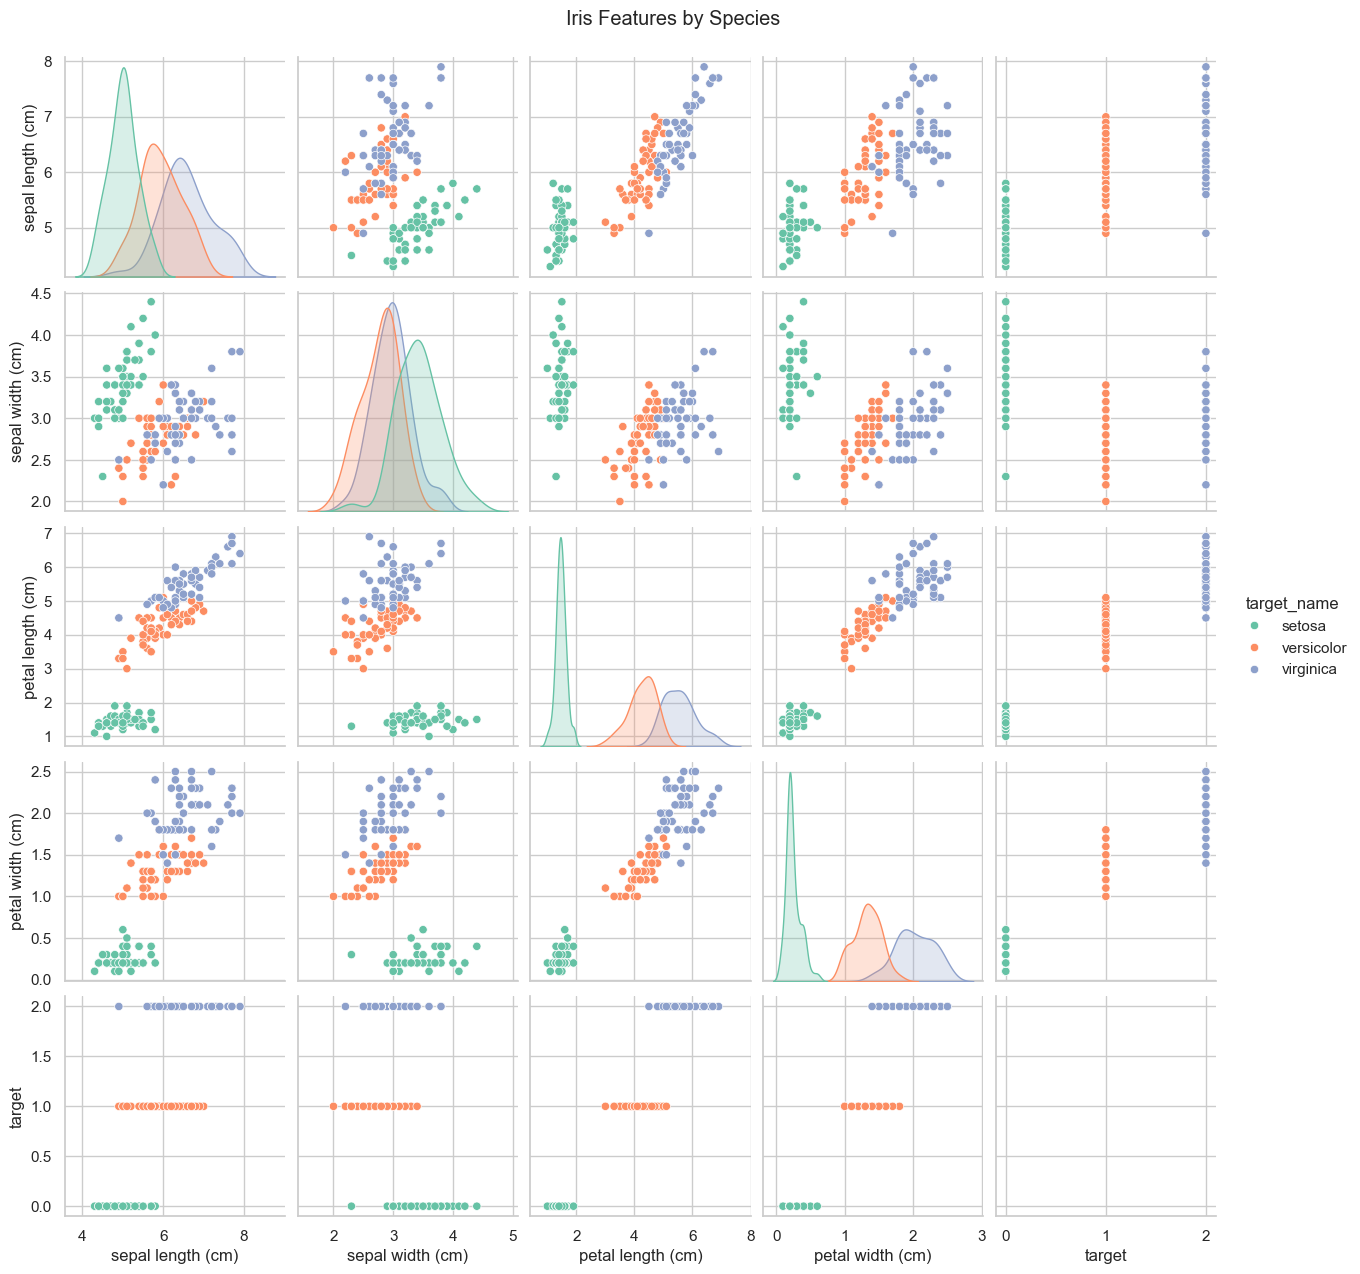

In [24]:
sns.pairplot(df, hue="target_name", palette="Set2")
plt.suptitle("Iris Features by Species", y=1.02)
plt.show()

### Training and Splitting Dataset

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### **XGBoost**

Convert to DMatrix (XGBoost format)

In [28]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

XGBoost parameters

In [29]:
params = {
    'eta': 0.3,
    'max_depth': 3,
    'objective': 'multi:softprob',
    'num_class': 3,
    'eval_metric': 'mlogloss',
    'verbosity': 0
}
num_rounds = 20

### Training the model

In [30]:
bst = xgb.train(params, dtrain, num_rounds)

### Making predictions

In [31]:
preds = bst.predict(dtest)
y_pred = np.argmax(preds, axis=1)

#### Evaluation

In [33]:
print("📋 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))

📋 Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Precision Score

In [35]:
print("🔍 Precision Score (Macro Avg):", precision_score(y_test, y_pred, average='macro'))

🔍 Precision Score (Macro Avg): 1.0


##### Confusion Matrix

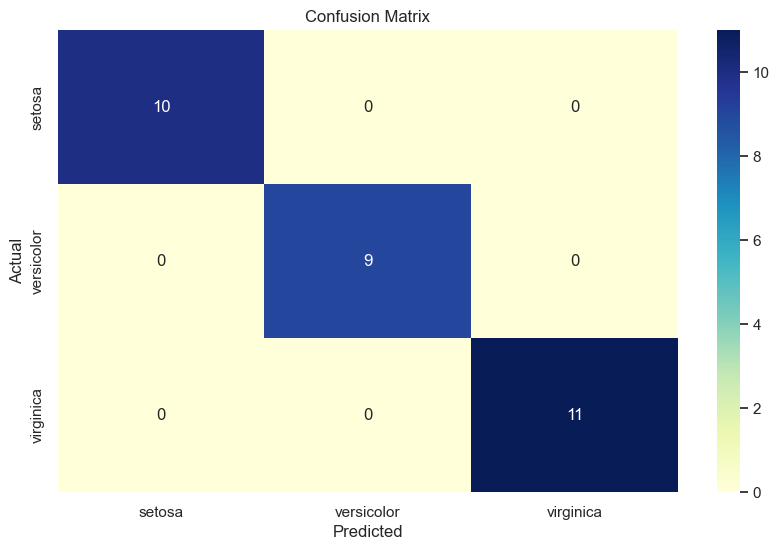

In [36]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()